In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
csv_path = 'adult_dataset.csv'
df = pd.read_csv(csv_path)

print(df.head())

   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

In [ ]:
print ("Rows     : \n" ,df.shape[0])
print ("Columns  : \n" ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values : \n", df.isnull().sum().values.sum())
print ("\nUnique values : \n", df.nunique())

Rows     : 
 32561
Columns  : 
 15

Features : 
 ['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income']

Missing values : 
 0

Unique values : 
 age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
print(df.describe())

                age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours.per.week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [ ]:
df_missing_workclass = (df['workclass']=='?').sum()
df_missing_workclass

1836

In [ ]:
df_missing = (df=='?').sum()
df_missing

,0
age,0
workclass,1836
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,1843
relationship,0
race,0
sex,0


In [ ]:
percent_missing = (df=='?').sum() * 100/len(df)
percent_missing

,0
age,0.000000
workclass,5.638647
fnlwgt,0.000000
education,0.000000
education.num,0.000000
marital.status,0.000000
occupation,5.660146
relationship,0.000000
race,0.000000
sex,0.000000


In [ ]:
df.apply(lambda x: x !='?',axis=1).sum()

,0
age,32561
workclass,30725
fnlwgt,32561
education,32561
education.num,32561
marital.status,32561
occupation,30718
relationship,32561
race,32561
sex,32561


In [ ]:
df_categorical = df.select_dtypes(include=['object'])

# checking whether any other column contains '?' value
df_categorical.apply(lambda x: x=='?',axis=1).sum()

,0
workclass,1836
education,0
marital.status,0
occupation,1843
relationship,0
race,0
sex,0
native.country,583
income,0


In [ ]:
df = df[df['native.country'] != '?']
df = df[df['occupation'] !='?']

In [ ]:
print(df)

       age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
from sklearn import preprocessing

# encode categorical variables using label Encoder
# select all categorical variables
df_categorical = df.select_dtypes(include=['object'])
print(df_categorical.head())

  workclass     education marital.status         occupation   relationship  \
0         ?       HS-grad        Widowed                  ?  Not-in-family   
1   Private       HS-grad        Widowed    Exec-managerial  Not-in-family   
2         ?  Some-college        Widowed                  ?      Unmarried   
3   Private       7th-8th       Divorced  Machine-op-inspct      Unmarried   
4   Private  Some-college      Separated     Prof-specialty      Own-child   

    race     sex native.country income  
0  White  Female  United-States  <=50K  
1  White  Female  United-States  <=50K  
2  Black  Female  United-States  <=50K  
3  White  Female  United-States  <=50K  
4  White  Female  United-States  <=50K  


In [ ]:
#appy label encoding
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
print(df_categorical.head())

   workclass  education  marital.status  occupation  relationship  race  sex  \
0          0         11               6           0             1     4    0   
1          4         11               6           4             1     4    0   
2          0         15               6           0             4     2    0   
3          4          5               0           7             4     4    0   
4          4         15               5          10             3     4    0   

   native.country  income  
0              39       0  
1              39       0  
2              39       0  
3              39       0  
4              39       0  


In [ ]:
df = df.drop(df_categorical.columns,axis=1)
print(df)

       age  fnlwgt  education.num  capital.gain  capital.loss  hours.per.week
0       90   77053              9             0          4356              40
1       82  132870              9             0          4356              18
2       66  186061             10             0          4356              40
3       54  140359              4             0          3900              40
4       41  264663             10             0          3900              40
...    ...     ...            ...           ...           ...             ...
32556   22  310152             10             0             0              40
32557   27  257302             12             0             0              38
32558   40  154374              9             0             0              40
32559   58  151910              9             0             0              40
32560   22  201490              9             0             0              20

[32561 rows x 6 columns]


In [ ]:
df = pd.concat([df,df_categorical],axis=1)
print(df.head())

   age  fnlwgt  education.num  capital.gain  capital.loss  hours.per.week  \
0   90   77053              9             0          4356              40   
1   82  132870              9             0          4356              18   
2   66  186061             10             0          4356              40   
3   54  140359              4             0          3900              40   
4   41  264663             10             0          3900              40   

   workclass  education  marital.status  occupation  relationship  race  sex  \
0          0         11               6           0             1     4    0   
1          4         11               6           4             1     4    0   
2          0         15               6           0             4     2    0   
3          4          5               0           7             4     4    0   
4          4         15               5          10             3     4    0   

   native.country  income  
0              39       0  


In [ ]:
df['income'] = df['income'].astype('category')

In [ ]:
print(df)

       age  fnlwgt  education.num  capital.gain  capital.loss  hours.per.week  \
0       90   77053              9             0          4356              40   
1       82  132870              9             0          4356              18   
2       66  186061             10             0          4356              40   
3       54  140359              4             0          3900              40   
4       41  264663             10             0          3900              40   
...    ...     ...            ...           ...           ...             ...   
32556   22  310152             10             0             0              40   
32557   27  257302             12             0             0              38   
32558   40  154374              9             0             0              40   
32559   58  151910              9             0             0              40   
32560   22  201490              9             0             0              20   

       workclass  education

In [ ]:
from sklearn.model_selection import train_test_split

# independent features to X
X = df.drop('income',axis=1)

# dependent variable to Y
Y = df['income']

In [ ]:
print(X.head())

   age  fnlwgt  education.num  capital.gain  capital.loss  hours.per.week  \
1   82  132870              9             0          4356              18   
3   54  140359              4             0          3900              40   
4   41  264663             10             0          3900              40   
5   34  216864              9             0          3770              45   
6   38  150601              6             0          3770              40   

   workclass  education  marital.status  occupation  relationship  race  sex  \
1          2         11               6           3             1     4    0   
3          2          5               0           6             4     4    0   
4          2         15               5           9             3     4    0   
5          2         11               0           7             4     4    0   
6          2          0               5           0             4     4    1   

   native.country  
1              38  
3              3

In [ ]:
Y.head()

,income
1,0
3,0
4,0
5,0
6,0


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=99)

print(X_train.head())

       age  fnlwgt  education.num  capital.gain  capital.loss  hours.per.week  \
24351   42  289636              9             0             0              46   
15626   37   52465              9             0             0              40   
4347    38  125933             14             0             0              40   
23972   44  183829             13             0             0              38   
26843   35  198841             11             0             0              35   

       workclass  education  marital.status  occupation  relationship  race  \
24351          2         11               2          13             0     4   
15626          1         11               4           7             1     4   
4347           0         12               2           9             0     4   
23972          5          9               4           0             1     4   
26843          2          8               0          12             3     4   

       sex  native.country  
24351    

In [ ]:
Y_train.head()

,income
24351,0
15626,0
4347,1
23972,0
26843,0


In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (21113, 14)
X_test shape: (9049, 14)
Y_train shape: (21113,)
Y_test shape: (9049,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
dec_tree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
Y_pred_dec_tree = dec_tree.predict(X_test)
Y_pred_dec_tree


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

print('Decision Tree Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_dec_tree) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_dec_tree) * 100, 2))

Decision Tree Classifier:
Accuracy score: 85.05
F1 score: 62.82


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_dec_tree)
cm

array([[6553,  314],
       [1039, 1143]])

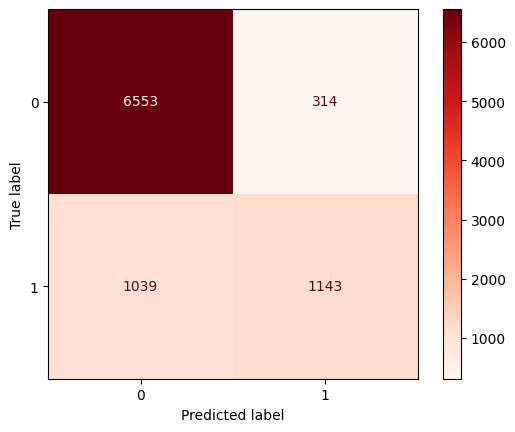

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')

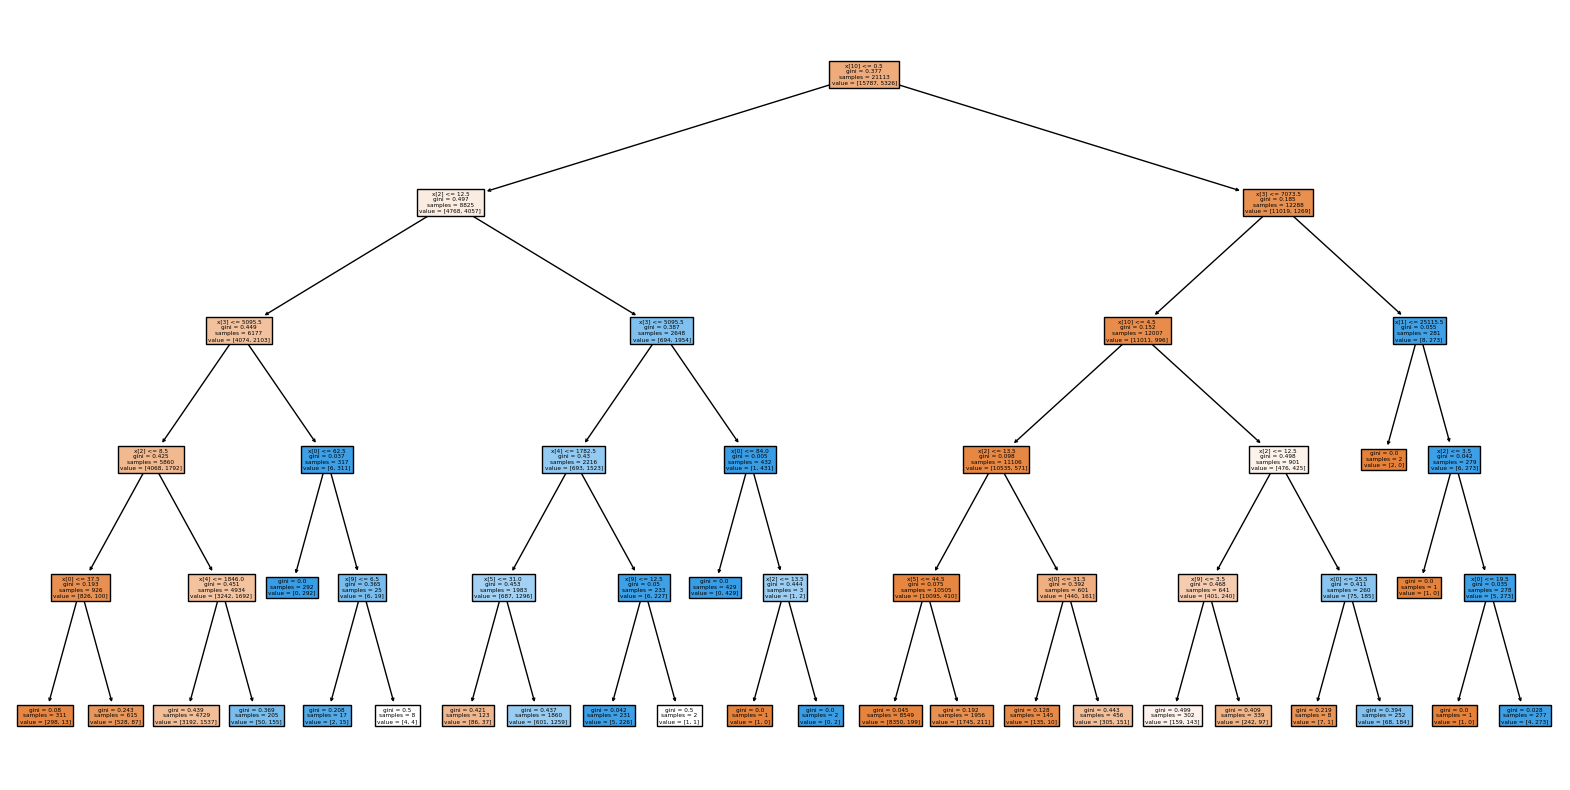

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

# Assuming 'clf' is your trained decision tree classifier
plt.figure(figsize=(20,10))
tree.plot_tree(dec_tree, filled=True)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}


In [ ]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',  # You can change this to 'f1' if you prefer
                           cv=5,  # 5-fold cross-validation
                           verbose=1,
                           n_jobs=-1)

# Fit the model using GridSearchCV
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [ ]:
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Score: 0.848339847441651


In [ ]:
best_dec_tree = grid_search.best_estimator_
Y_pred_best_dec_tree = best_dec_tree.predict(X_test)

In [ ]:
print('Tuned Decision Tree Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_best_dec_tree) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_best_dec_tree) * 100, 2))

Tuned Decision Tree Classifier:
Accuracy score: 84.98
F1 score: 66.03


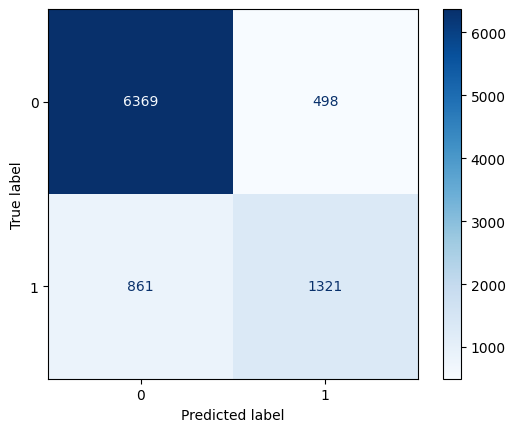

In [ ]:
cm_best = confusion_matrix(Y_test, Y_pred_best_dec_tree)
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best)
disp_best.plot(cmap='Blues')


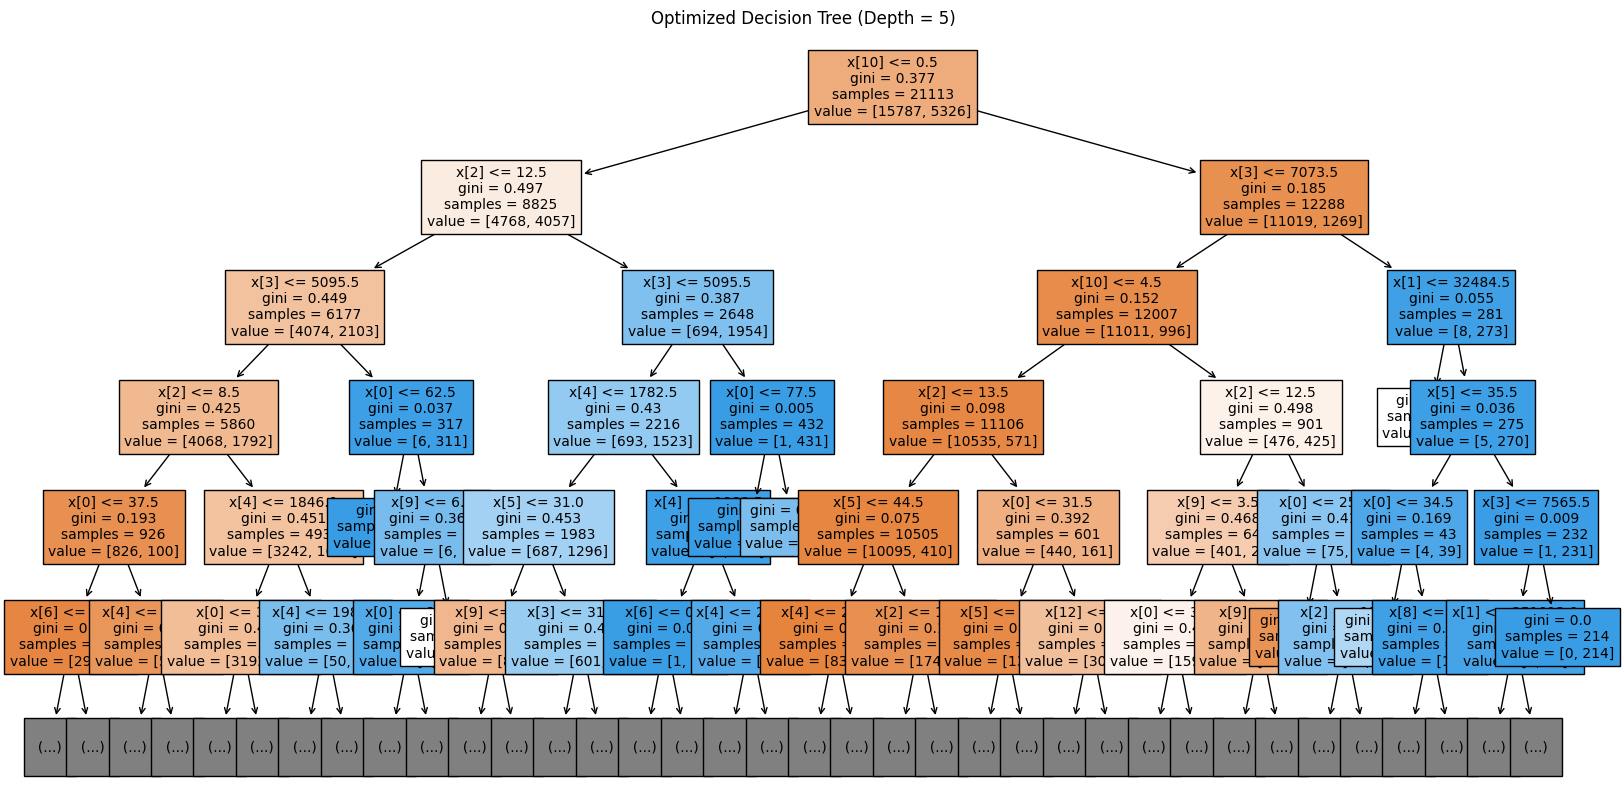

In [ ]:
plt.figure(figsize=(20,10))
tree.plot_tree(best_dec_tree, max_depth=5, filled=True, fontsize=10)
plt.title('Optimized Decision Tree (Depth = 5)')
plt.show()

Before Hyperparameter Tuning

> Add blockquote



In [56]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix

precision_before = precision_score(Y_test, Y_pred_dec_tree)
recall_before = recall_score(Y_test, Y_pred_dec_tree)
accuracy_before = accuracy_score(Y_test, Y_pred_dec_tree)
f1_before = f1_score(Y_test, Y_pred_dec_tree)
confusion_matrix_before = confusion_matrix(Y_test, Y_pred_dec_tree)

print("Before Tuning")
print(f"Accuracy: {accuracy_before:.2f}")
print(f"F1 Score: {f1_before:.2f}")
print(f"Precision: {precision_before:.2f}")
print(f"Recall: {recall_before:.2f}")
print(f"Confusion Matrix: \n{confusion_matrix_before}")


Before Tuning
Accuracy: 0.85
F1 Score: 0.63
Precision: 0.78
Recall: 0.52
Confusion Matrix: 
[[6553  314]
 [1039 1143]]


After Hyperparameter Tuning



In [57]:
precision_after = precision_score(Y_test, Y_pred_best_dec_tree)
recall_after = recall_score(Y_test, Y_pred_best_dec_tree)
accuracy_after = accuracy_score(Y_test, Y_pred_best_dec_tree)
f1_after = f1_score(Y_test, Y_pred_best_dec_tree)
confusion_matrix_after = confusion_matrix(Y_test, Y_pred_best_dec_tree)

print("After Tuning")
print(f"Accuracy: {accuracy_after:.2f}")
print(f"F1 Score: {f1_after:.2f}")
print(f"Precision: {precision_after:.2f}")
print(f"Recall: {recall_after:.2f}")
print(f"Confusion Matrix: \n{confusion_matrix_after}")


After Tuning
Accuracy: 0.85
F1 Score: 0.66
Precision: 0.73
Recall: 0.61
Confusion Matrix: 
[[6369  498]
 [ 861 1321]]
